# Statistiche e grafici delle risoluzioni dei cubi di Rubik

In [27]:
from pandas import read_csv
import matplotlib.pyplot as plt
import modulo_rubik

df = read_csv("../database.csv", sep="\t", parse_dates=["Data"])
# Inserimento colonna "Tempo" con i secondi convertiti in minuti e secondi
df.insert(loc=2, column="Tempo", value=df["Secondi"].apply(modulo_rubik.conversione_secondi))

## Record personali per tipo di cubo 🥇🥈🥉

In [28]:
# Elenco di tutti i record
modulo_rubik.mostra_record(df=df)

                Tempo
Cubo                 
2x2        (0, 15.12)
3x3        (0, 40.44)
4x4         (3, 5.99)
mirror     (3, 58.89)
kilominx   (6, 36.86)
5x5        (7, 49.48)
megaminx  (30, 10.61)


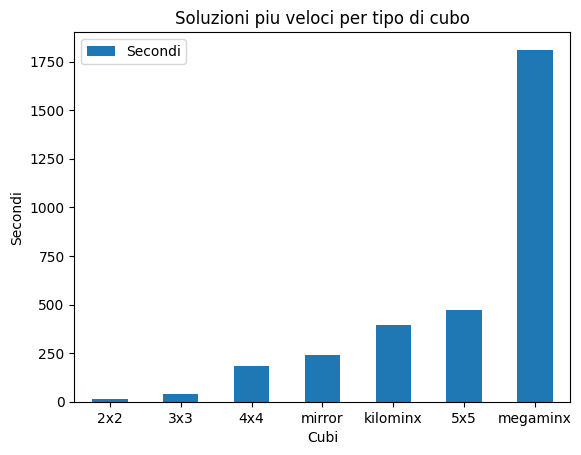

In [29]:
# Creazione grafico di tutti i record
modulo_rubik.grafico_tutti_record(df=df)

## Medie dei tempi di risoluzione

In [30]:
modulo_rubik.calcola_media_risoluzioni(df=df)

Media in secondi

 Cubo
2x2           60.92
3x3           71.97
4x4          258.37
5x5          695.84
kilominx     540.96
megaminx    2155.38
mirror       520.28
Name: Secondi, dtype: float64 

Media in minuti e secondi

Cubo     Minuti e secondi
2x2 	 (1, 0.92)
3x3 	 (1, 11.97)
4x4 	 (4, 18.37)
5x5 	 (11, 35.84)
kilominx 	 (9, 0.96)
megaminx 	 (35, 55.38)
mirror 	 (8, 40.28)


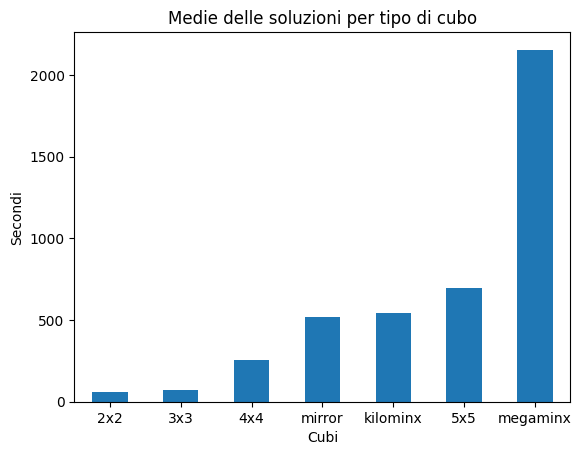

In [31]:
# Creazione grafico
modulo_rubik.grafico_media_risoluzioni(df=df)

## Numero di risoluzioni

In [32]:
# Numero di risoluzioni dei diversi cubi
modulo_rubik.calcola_num_risoluzioni(df=df)

Cubo
3x3         71
4x4         62
2x2         53
5x5         29
mirror      12
kilominx     6
megaminx     3
Name: count, dtype: int64


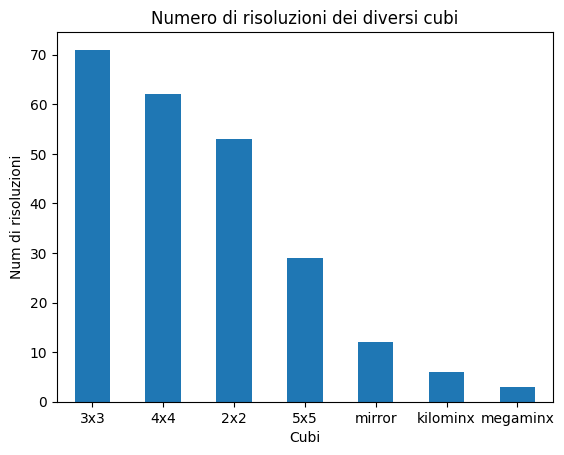

In [33]:
# Creazione grafico
modulo_rubik.grafico_num_risoluzioni(df=df)

In [34]:
df = modulo_rubik.aggiunta_colonne_data(df)

In [35]:
# Numero di risoluzioni del 2025 per ogni mese
df[df["Anno"] == 2025]["Mese"].value_counts()

Mese
Gen    41
Feb    35
Ago    29
Nov    25
Mag    24
Lug    14
Set    12
Mar    12
Ott     6
Apr     2
Name: count, dtype: int64

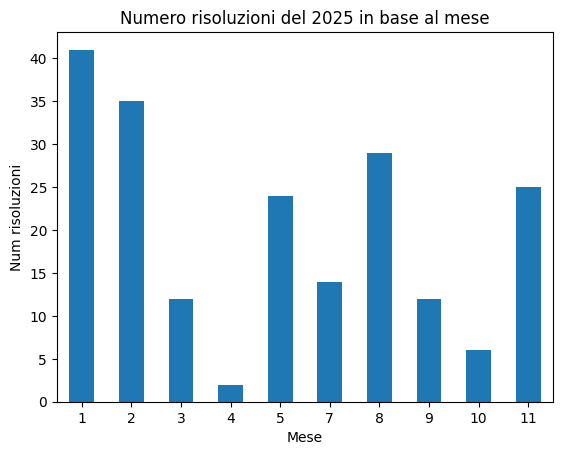

In [36]:
# Grafico del numero di risoluzioni del 2025 mese per mese
modulo_rubik.grafico_risoluz_mensile(df_cubo=df, anno=2025)

In [37]:
# Numero di risoluzioni del 2026 per ogni mese
df[df["Anno"] == 2026]["Mese"].value_counts()

Mese
Feb    19
Gen    17
Name: count, dtype: int64

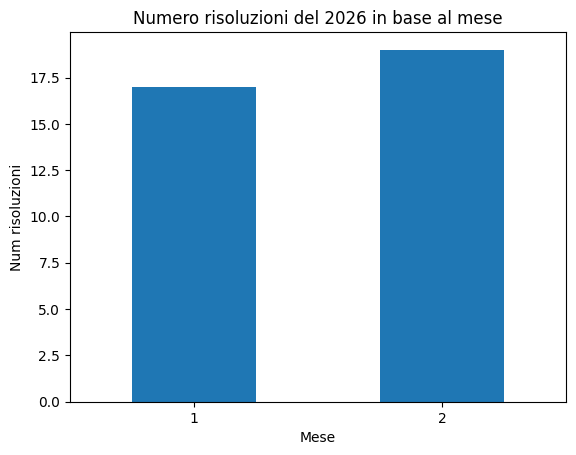

In [38]:
# Grafico del numero di risoluzioni del 2026 mese per mese
modulo_rubik.grafico_risoluz_mensile(df_cubo=df, anno=2026)

In [39]:
# Ultime 10 risoluzioni
df.tail(10)

,Data completa,Anno,Mese,Giorno,Secondi,Tempo,Cubo
226,2026-02-05,2026,Feb,5,233.55,"(3, 53.55)",4x4
227,2026-02-15,2026,Feb,15,431.58,"(7, 11.58)",mirror
228,2026-02-15,2026,Feb,15,383.23,"(6, 23.23)",mirror
229,2026-02-15,2026,Feb,15,743.36,"(12, 23.36)",mirror
230,2026-02-17,2026,Feb,17,746.26,"(12, 26.26)",kilominx
231,2026-02-17,2026,Feb,17,640.63,"(10, 40.63)",kilominx
232,2026-02-17,2026,Feb,17,442.95,"(7, 22.95)",kilominx
233,2026-02-18,2026,Feb,18,542.82,"(9, 2.82)",kilominx
234,2026-02-18,2026,Feb,18,396.86,"(6, 36.86)",kilominx
235,2026-02-18,2026,Feb,18,476.23,"(7, 56.23)",kilominx
